LAB 05 - MACHINE LEARNING ASSIGNMENT
Dataset Shape: (469, 141)
Features: 30
Training Set Size: (375, 30)
Test Set Size: (94, 30)
Target Variable: CallerAge (Range: 61 - 21985)

A1: LINEAR REGRESSION WITH SINGLE FEATURE
Selected Feature: V1
Single feature linear regression model trained successfully!

A2: REGRESSION METRICS EVALUATION
SINGLE FEATURE - TRAINING SET METRICS:
MSE:  17078078.06
RMSE: 4132.56
MAPE: 1.3318
R2:   0.0275

SINGLE FEATURE - TEST SET METRICS:
MSE:  21614859.43
RMSE: 4649.18
MAPE: 0.8028
R2:   0.0676

A3: LINEAR REGRESSION WITH MULTIPLE FEATURES
MULTIPLE FEATURES - TRAINING SET METRICS:
MSE:  10932284.17
RMSE: 3306.40
MAPE: 0.8085
R2:   0.3775

MULTIPLE FEATURES - TEST SET METRICS:
MSE:  18455555.50
RMSE: 4295.99
MAPE: 0.5925
R2:   0.2039

A4: K-MEANS CLUSTERING (k=2)
Cluster Labels: (array([0, 1]), array([111, 264], dtype=int64))
Cluster Centers Shape: (2, 30)

A5: CLUSTERING EVALUATION METRICS (k=2)
Silhouette Score:      0.1702
Calinski-Harabasz Score: 46.02
Dav

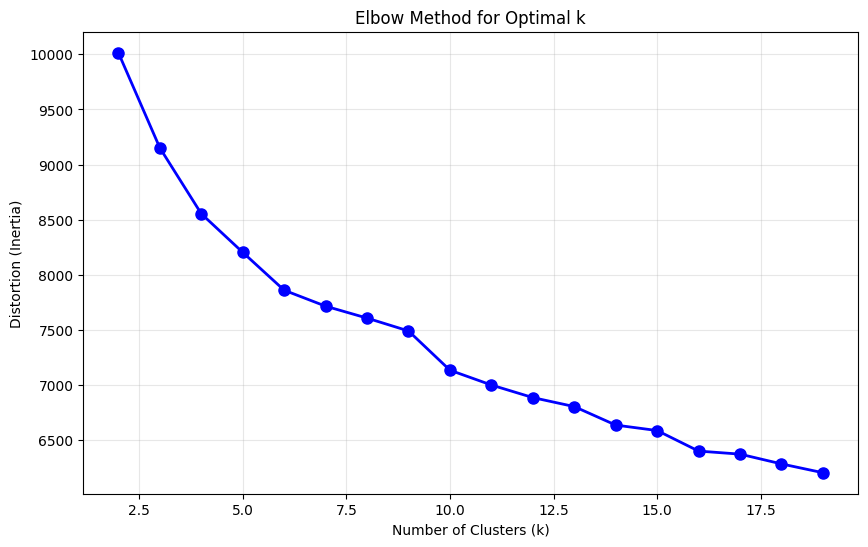

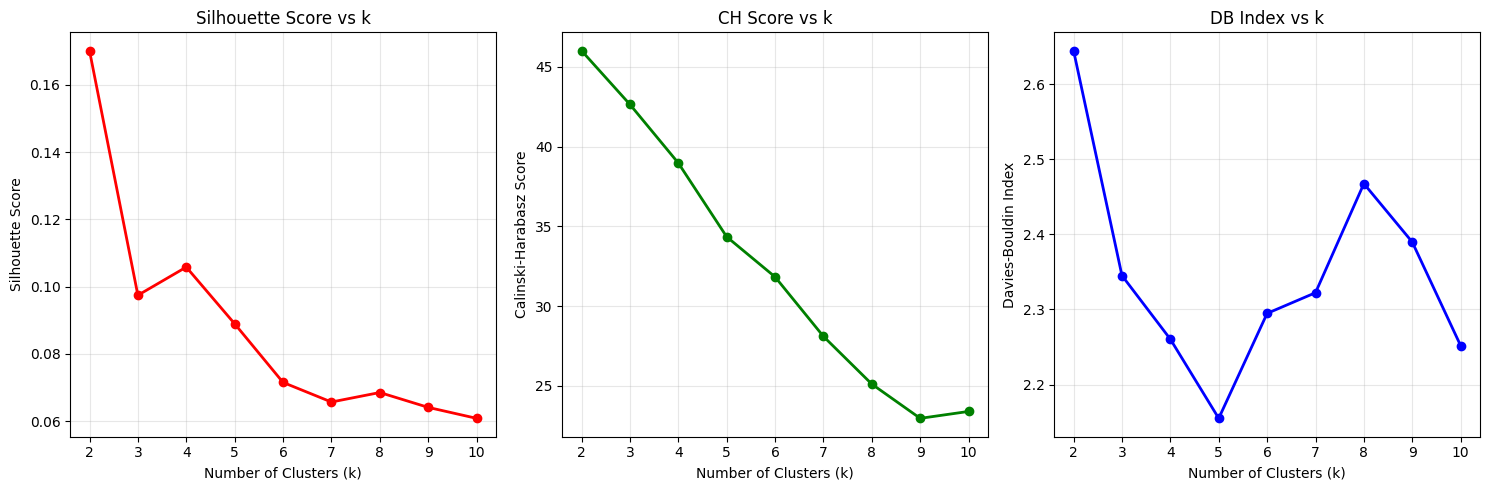


ANALYSIS COMPLETE!

KEY FINDINGS:
1. Single feature R²: 0.0676 vs Multiple features R²: 0.2039
2. Best clustering k (Silhouette): 2
3. Elbow method suggests k: 3
4. Multiple features show better performance than single feature


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Function for A1: Train Linear Regression with single attribute
def train_single_regression(X_train, y_train, feature_idx=0):
    """Train linear regression model with single feature"""
    X_single = X_train[:, feature_idx].reshape(-1, 1)
    reg = LinearRegression().fit(X_single, y_train)
    y_pred = reg.predict(X_single)
    return reg, y_pred, X_single

# Function for A2: Calculate regression metrics
def calculate_regression_metrics(y_true, y_pred):
    """Calculate MSE, RMSE, MAPE, and R2 scores"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Function for A3: Train Linear Regression with multiple attributes
def train_multiple_regression(X_train, y_train):
    """Train linear regression model with all features"""
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_train)
    return reg, y_pred

# Function for A4: Perform K-means clustering
def perform_kmeans(X_data, n_clusters=2, random_state=42):
    """Perform K-means clustering"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init="auto").fit(X_data)
    return kmeans

# Function for A5: Calculate clustering metrics
def calculate_clustering_metrics(X_data, labels):
    """Calculate Silhouette Score, CH Score, and DB Index"""
    silhouette = silhouette_score(X_data, labels)
    ch_score = calinski_harabasz_score(X_data, labels)
    db_index = davies_bouldin_score(X_data, labels)
    return silhouette, ch_score, db_index

# Function for A6: K-means for different k values
def kmeans_different_k(X_data, k_range=range(2, 11)):
    """Perform K-means for different k values and return metrics"""
    results = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_data)
        silhouette, ch_score, db_index = calculate_clustering_metrics(X_data, kmeans.labels_)
        results.append({
            'k': k,
            'silhouette': silhouette,
            'ch_score': ch_score,
            'db_index': db_index
        })
    return results

# Function for A7: Elbow method
def elbow_method(X_data, k_range=range(2, 20)):
    """Perform elbow method to find optimal k"""
    distortions = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_data)
        distortions.append(kmeans.inertia_)
    return list(k_range), distortions

# Function to plot elbow curve
def plot_elbow_curve(k_values, distortions):
    """Plot elbow curve"""
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, distortions, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True, alpha=0.3)
    plt.show()

# Function to plot clustering metrics
def plot_clustering_metrics(results):
    """Plot clustering evaluation metrics"""
    k_values = [r['k'] for r in results]
    silhouette_scores = [r['silhouette'] for r in results]
    ch_scores = [r['ch_score'] for r in results]
    db_scores = [r['db_index'] for r in results]
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Silhouette Score
    axes[0].plot(k_values, silhouette_scores, 'ro-', linewidth=2, markersize=6)
    axes[0].set_xlabel('Number of Clusters (k)')
    axes[0].set_ylabel('Silhouette Score')
    axes[0].set_title('Silhouette Score vs k')
    axes[0].grid(True, alpha=0.3)
    
    # CH Score
    axes[1].plot(k_values, ch_scores, 'go-', linewidth=2, markersize=6)
    axes[1].set_xlabel('Number of Clusters (k)')
    axes[1].set_ylabel('Calinski-Harabasz Score')
    axes[1].set_title('CH Score vs k')
    axes[1].grid(True, alpha=0.3)
    
    # DB Index
    axes[2].plot(k_values, db_scores, 'bo-', linewidth=2, markersize=6)
    axes[2].set_xlabel('Number of Clusters (k)')
    axes[2].set_ylabel('Davies-Bouldin Index')
    axes[2].set_title('DB Index vs k')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Main Program
if __name__ == "__main__":
    # Load the dataset
    data = pd.read_csv('20231225_dfall_obs_data_and_spectral_features_revision1_n469.csv')
    
    # Data preprocessing
    # Remove rows with missing target values (CallerAge)
    data_clean = data.dropna(subset=['CallerAge'])
    
    # Select features (spectral features and acoustic features)
    feature_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                   'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
                   'sprsMed', 'sprsMbw', 'sprsEqbw', 'sprsMc', 
                   'F1', 'F2', 'F3', 'F4', 'M1', 'M2', 'M3', 'M4']
    
    # Prepare feature matrix and target vector
    X = data_clean[feature_cols].fillna(0).values  # Fill NaN with 0 for features
    y = data_clean['CallerAge'].values
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize features for clustering
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("="*60)
    print("LAB 05 - MACHINE LEARNING ASSIGNMENT")
    print("="*60)
    print(f"Dataset Shape: {data_clean.shape}")
    print(f"Features: {len(feature_cols)}")
    print(f"Training Set Size: {X_train.shape}")
    print(f"Test Set Size: {X_test.shape}")
    print(f"Target Variable: CallerAge (Range: {y.min():.0f} - {y.max():.0f})")
    
    # A1: Linear Regression with Single Feature
    print("\n" + "="*60)
    print("A1: LINEAR REGRESSION WITH SINGLE FEATURE")
    print("="*60)
    reg_single, y_train_pred_single, X_single = train_single_regression(X_train, y_train, feature_idx=0)
    print(f"Selected Feature: {feature_cols[0]}")
    print("Single feature linear regression model trained successfully!")
    
    # A2: Calculate Metrics for Single Feature
    print("\n" + "="*60)
    print("A2: REGRESSION METRICS EVALUATION")
    print("="*60)
    
    # Train set metrics
    mse_train, rmse_train, mape_train, r2_train = calculate_regression_metrics(y_train, y_train_pred_single)
    print("SINGLE FEATURE - TRAINING SET METRICS:")
    print(f"MSE:  {mse_train:.2f}")
    print(f"RMSE: {rmse_train:.2f}")
    print(f"MAPE: {mape_train:.4f}")
    print(f"R2:   {r2_train:.4f}")
    
    # Test set metrics
    X_test_single = X_test[:, 0].reshape(-1, 1)
    y_test_pred_single = reg_single.predict(X_test_single)
    mse_test, rmse_test, mape_test, r2_test = calculate_regression_metrics(y_test, y_test_pred_single)
    print("\nSINGLE FEATURE - TEST SET METRICS:")
    print(f"MSE:  {mse_test:.2f}")
    print(f"RMSE: {rmse_test:.2f}")
    print(f"MAPE: {mape_test:.4f}")
    print(f"R2:   {r2_test:.4f}")
    
    # A3: Linear Regression with Multiple Features
    print("\n" + "="*60)
    print("A3: LINEAR REGRESSION WITH MULTIPLE FEATURES")
    print("="*60)
    reg_multiple, y_train_pred_multiple = train_multiple_regression(X_train, y_train)
    
    # Multiple features - train metrics
    mse_train_mult, rmse_train_mult, mape_train_mult, r2_train_mult = calculate_regression_metrics(y_train, y_train_pred_multiple)
    print("MULTIPLE FEATURES - TRAINING SET METRICS:")
    print(f"MSE:  {mse_train_mult:.2f}")
    print(f"RMSE: {rmse_train_mult:.2f}")
    print(f"MAPE: {mape_train_mult:.4f}")
    print(f"R2:   {r2_train_mult:.4f}")
    
    # Multiple features - test metrics
    y_test_pred_multiple = reg_multiple.predict(X_test)
    mse_test_mult, rmse_test_mult, mape_test_mult, r2_test_mult = calculate_regression_metrics(y_test, y_test_pred_multiple)
    print("\nMULTIPLE FEATURES - TEST SET METRICS:")
    print(f"MSE:  {mse_test_mult:.2f}")
    print(f"RMSE: {rmse_test_mult:.2f}")
    print(f"MAPE: {mape_test_mult:.4f}")
    print(f"R2:   {r2_test_mult:.4f}")
    
    # A4: K-means Clustering
    print("\n" + "="*60)
    print("A4: K-MEANS CLUSTERING (k=2)")
    print("="*60)
    kmeans_2 = perform_kmeans(X_train_scaled, n_clusters=2)
    print(f"Cluster Labels: {np.unique(kmeans_2.labels_, return_counts=True)}")
    print(f"Cluster Centers Shape: {kmeans_2.cluster_centers_.shape}")
    
    # A5: Clustering Metrics for k=2
    print("\n" + "="*60)
    print("A5: CLUSTERING EVALUATION METRICS (k=2)")
    print("="*60)
    silhouette_2, ch_2, db_2 = calculate_clustering_metrics(X_train_scaled, kmeans_2.labels_)
    print(f"Silhouette Score:      {silhouette_2:.4f}")
    print(f"Calinski-Harabasz Score: {ch_2:.2f}")
    print(f"Davies-Bouldin Index:    {db_2:.4f}")
    
    # A6: K-means for Different k Values
    print("\n" + "="*60)
    print("A6: K-MEANS EVALUATION FOR DIFFERENT k VALUES")
    print("="*60)
    k_results = kmeans_different_k(X_train_scaled, k_range=range(2, 11))
    
    print("k\tSilhouette\tCH Score\tDB Index")
    print("-" * 45)
    for result in k_results:
        print(f"{result['k']}\t{result['silhouette']:.4f}\t\t{result['ch_score']:.2f}\t\t{result['db_index']:.4f}")
    
    # Find optimal k based on silhouette score
    best_k_silhouette = max(k_results, key=lambda x: x['silhouette'])
    print(f"\nBest k (Silhouette): {best_k_silhouette['k']} (Score: {best_k_silhouette['silhouette']:.4f})")
    
    # A7: Elbow Method
    print("\n" + "="*60)
    print("A7: ELBOW METHOD FOR OPTIMAL k")
    print("="*60)
    k_values, distortions = elbow_method(X_train_scaled, k_range=range(2, 20))
    
    print("k\tInertia")
    print("-" * 20)
    for k, inertia in zip(k_values[:10], distortions[:10]):  # Show first 10
        print(f"{k}\t{inertia:.2f}")
    print("...")
    
    # Calculate elbow point (simple method - look for largest decrease)
    decreases = [distortions[i] - distortions[i+1] for i in range(len(distortions)-1)]
    elbow_k = k_values[decreases.index(max(decreases)) + 1]
    print(f"\nSuggested Optimal k (Elbow Method): {elbow_k}")
    
    # Plot results
    print("\n" + "="*60)
    print("GENERATING PLOTS...")
    print("="*60)
    
    # Plot elbow curve
    plot_elbow_curve(k_values, distortions)
    
    # Plot clustering metrics
    plot_clustering_metrics(k_results)
    
    print("\n" + "="*60)
    print("ANALYSIS COMPLETE!")
    print("="*60)
    print("\nKEY FINDINGS:")
    print(f"1. Single feature R²: {r2_test:.4f} vs Multiple features R²: {r2_test_mult:.4f}")
    print(f"2. Best clustering k (Silhouette): {best_k_silhouette['k']}")
    print(f"3. Elbow method suggests k: {elbow_k}")
    print(f"4. Multiple features show {'better' if r2_test_mult > r2_test else 'worse'} performance than single feature")